In [2]:
import pandas as pd
import numpy as np

In [3]:
df_lego = pd.read_csv('../01_Data_Cleaning/df_lego_final.csv')

df_lego.head()

,SetID,Number,YearFrom,Category,Theme,Subtheme,SetName,ImageFilename,USRetailPrice,Pieces,...,YearsSinceExit,PriceChange,ResaleDemand,AppreciationTrend,SizeCategory,Exclusivity,ThemePopularity,InvestmentScore,AnnualPriceIncrease,AnnualPercentageIncrease
0,7530,10,1973,Normal,Duplo,Unknown,Pre-School Set,Unknown,0.0,17.0,...,51,0.0,0.0,0.0,Small,Regular,0.0,0.0,0.0,0.0
1,7531,20,1973,Normal,Duplo,Unknown,Building Set,Unknown,0.0,25.0,...,51,0.0,0.0,0.0,Small,Regular,0.0,0.0,0.0,0.0
2,1119,28,1979,Normal,Duplo,Unknown,Nursery Furniture,028-1,0.0,7.0,...,45,0.0,0.0,0.0,Small,Regular,0.0,0.0,0.0,0.0
3,7532,30,1973,Normal,Duplo,Unknown,Building Set,Unknown,0.0,29.0,...,51,0.0,0.0,0.0,Small,Regular,0.0,0.0,0.0,0.0
4,1382,32,1979,Normal,Duplo,Unknown,Living Room Furniture,032-1,0.0,14.0,...,45,0.0,0.0,0.0,Small,Regular,0.0,0.0,0.0,0.0


***SELECCIÓN DEFINITIVA DE THEMES***

In [4]:
# Cuento la cantidad de sets por Theme con 'AnnualPercentageIncrease' distinto de 0
theme_counts = df_lego[df_lego['AnnualPercentageIncrease'] != 0].groupby('Theme').size().sort_values(ascending=False)


In [5]:
theme_counts

Theme
Collectable Minifigures    773
Duplo                      691
Star Wars                  633
City                       585
Friends                    413
Technic                    347
Creator                    318
Ninjago                    301
Marvel Super Heroes        205
BrickHeadz                 144
Disney                     138
Harry Potter               119
Education                  103
DC Comics Super Heroes      97
Minecraft                   94
Classic                     66
Icons                       62
Speed Champions             58
Architecture                47
Ideas                       45
Jurassic World              44
dtype: int64

In [6]:
# Cuento la cantidad total de sets por Theme
theme_total_counts = df_lego.groupby('Theme').size().sort_values(ascending=False)

In [7]:
theme_total_counts

Theme
Duplo                      1339
Star Wars                   980
City                        935
Collectable Minifigures     891
Friends                     625
Ninjago                     572
Creator                     565
Technic                     524
Marvel Super Heroes         331
Education                   319
Disney                      203
Harry Potter                181
DC Comics Super Heroes      180
BrickHeadz                  174
Minecraft                   158
Icons                       123
Jurassic World              103
Classic                      98
Speed Champions              83
Ideas                        72
Architecture                 61
dtype: int64

In [8]:
# Recalculo el porcentaje anual de revalorización
df_lego['AnnualPercentageIncrease'] = ((df_lego['BrickLinkSoldPriceNew'] - df_lego['USRetailPrice']) / 
                                       (df_lego['USRetailPrice'] * df_lego['YearsSinceExit'])) * 100

# Reemplazo valores infinitos o NaN
df_lego.replace([np.inf, -np.inf], np.nan, inplace=True)
df_lego['AnnualPercentageIncrease'].fillna(0, inplace=True)

# Cuento la cantidad de sets con revalorización (AnnualPercentageIncrease ≠ 0) por Theme
theme_revalued_counts = df_lego[df_lego['AnnualPercentageIncrease'] != 0].groupby('Theme').size()

# Cuento el total de sets por Theme
theme_total_counts = df_lego.groupby('Theme').size()

# Calculo el porcentaje de sets revalorizados en cada tema
theme_revaluation_percentage = (theme_revalued_counts / theme_total_counts) * 100

/var/folders/41/9xs275yn7jxbs_h59j3pq3sw0000gn/T/ipykernel_46651/2078486249.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_lego['AnnualPercentageIncrease'].fillna(0, inplace=True)


In [9]:
# Junto todo en un solo dataframe para mejor visualización
theme_analysis = pd.DataFrame({
    "Total Sets": theme_total_counts,
    "Revalued Sets": theme_revalued_counts,
    "Percentage Revalued": theme_revaluation_percentage
}).fillna(0).sort_values(by="Percentage Revalued", ascending=False)

In [10]:
# Incluyo la columna 'Exclusivity' en el análisis

# Obtengo la exclusividad más común por tema
theme_exclusivity = df_lego.groupby('Theme')['Exclusivity'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else 'None')

# Añado la columna 'Exclusivity' al análisis ya hecho
theme_analysis['Exclusivity'] = theme_exclusivity

# Reorganizo columnas para mejor visualización
theme_analysis = theme_analysis[['Exclusivity', 'Total Sets', 'Revalued Sets', 'Percentage Revalued']]

In [11]:
theme_analysis

,Exclusivity,Total Sets,Revalued Sets,Percentage Revalued
Theme,,,,
Collectable Minifigures,Regular,891,773,86.756453
BrickHeadz,Regular,174,144,82.758621
Architecture,Exclusive,61,47,77.049180
Speed Champions,Regular,83,58,69.879518
Disney,Regular,203,138,67.980296
Classic,Regular,98,66,67.346939
Technic,Regular,524,347,66.221374
Friends,Regular,625,413,66.080000
Harry Potter,Exclusive,181,119,65.745856


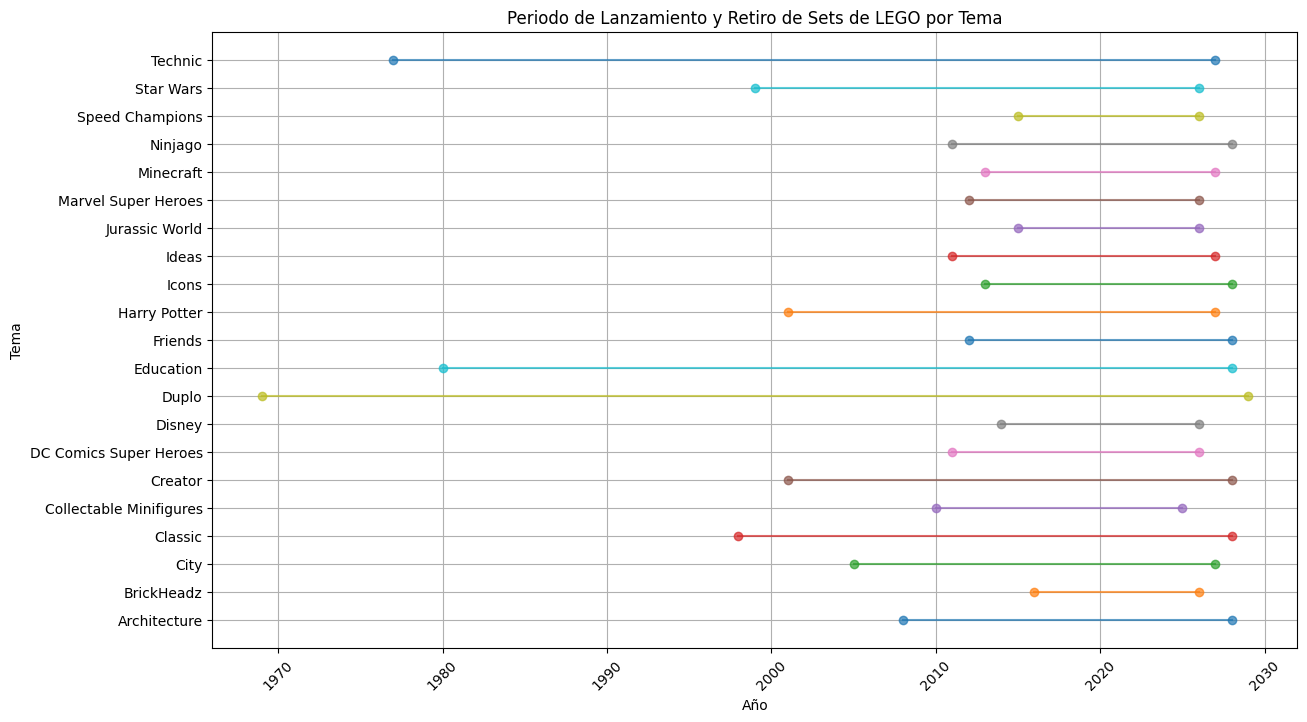

In [12]:
import matplotlib.pyplot as plt
# Agrupo por tema para obtener los rangos de lanzamiento de sets y retirada
theme_ranges = df_lego.groupby('Theme').agg(
    LaunchStart=('LaunchYear', 'min'),
    LaunchEnd=('ExitYear', 'max')
).reset_index()

# Creo el gráfico
plt.figure(figsize=(14, 8))

# Marco los intervalos de lanzamiento y retirada de cada tema
for index, row in theme_ranges.iterrows():
    plt.plot([row['LaunchStart'], row['LaunchEnd']], [row['Theme'], row['Theme']], marker='o', linestyle='-', alpha=0.7)

# Configuro el gráfico
plt.xlabel('Año')
plt.ylabel('Tema')
plt.title('Periodo de Lanzamiento y Retiro de Sets de LEGO por Tema')
plt.xticks(rotation=45)
plt.grid(True)

plt.show()


In [13]:
# Filtro los sets que han sido retirados (ExitYear < 2025)
df_lego_retired = df_lego[df_lego['ExitYear'] < 2025].copy()

# Recalculo AnnualPercentageIncrease solo para sets retirados
df_lego_retired['AnnualPercentageIncrease'] = ((df_lego_retired['BrickLinkSoldPriceNew'] - df_lego_retired['USRetailPrice']) / 
                                               (df_lego_retired['USRetailPrice'] * df_lego_retired['YearsSinceExit'])) * 100

# Reemplazo valores infinitos o NaN
df_lego_retired.replace([np.inf, -np.inf], np.nan, inplace=True)
df_lego_retired['AnnualPercentageIncrease'].fillna(0, inplace=True)

# Cuento la cantidad de sets retirados que se han revalorizado (AnnualPercentageIncrease ≠ 0) por Theme
theme_revalued_counts_retired = df_lego_retired[df_lego_retired['AnnualPercentageIncrease'] != 0].groupby('Theme').size()

# Cuento el total de sets retirados por Theme
theme_total_counts_retired = df_lego_retired.groupby('Theme').size()

# Calculo el porcentaje de sets revalorizados en cada tema
theme_revaluation_percentage_retired = (theme_revalued_counts_retired / theme_total_counts_retired) * 100


/var/folders/41/9xs275yn7jxbs_h59j3pq3sw0000gn/T/ipykernel_46651/2553767679.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_lego_retired['AnnualPercentageIncrease'].fillna(0, inplace=True)


In [14]:
# Hago un df con todo para mejor visualización
theme_analysis_retired = pd.DataFrame({
    "Total Sets": theme_total_counts_retired,
    "Revalued Sets": theme_revalued_counts_retired,
    "Percentage Revalued": theme_revaluation_percentage_retired
}).fillna(0).sort_values(by="Percentage Revalued", ascending=False)

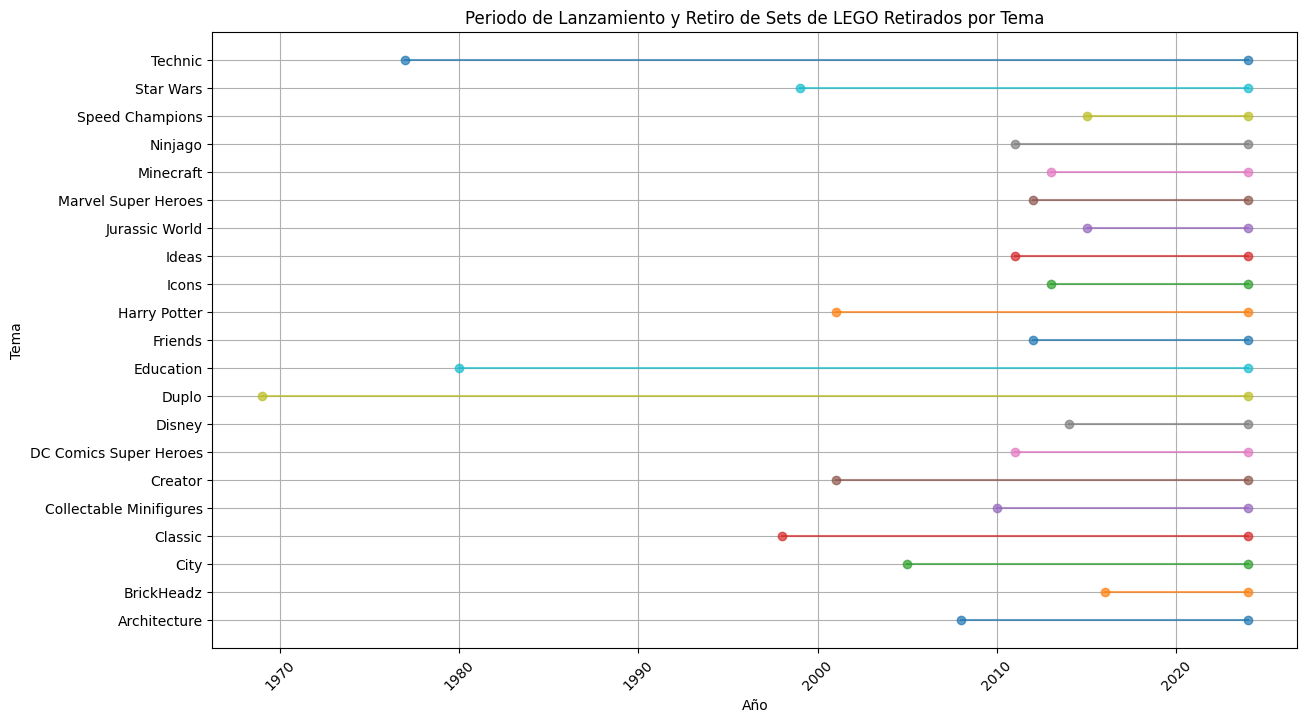

In [15]:
import matplotlib.pyplot as plt

# Utilizo los datos de revalorización de sets retirados
theme_ranges_retired = df_lego_retired.groupby('Theme').agg(
    LaunchStart=('LaunchYear', 'min'),
    LaunchEnd=('ExitYear', 'max')
).reset_index()

# Creo el gráfico
plt.figure(figsize=(14, 8))

# Marco los intervalos de lanzamiento y retirada de cada tema
for index, row in theme_ranges_retired.iterrows():
    plt.plot([row['LaunchStart'], row['LaunchEnd']], [row['Theme'], row['Theme']], marker='o', linestyle='-', alpha=0.7)

# Configuro el gráfico
plt.xlabel('Año')
plt.ylabel('Tema')
plt.title('Periodo de Lanzamiento y Retiro de Sets de LEGO Retirados por Tema')
plt.xticks(rotation=45)
plt.grid(True)

plt.show()


In [16]:
theme_ranges_retired

,Theme,LaunchStart,LaunchEnd
0,Architecture,2008,2024
1,BrickHeadz,2016,2024
2,City,2005,2024
3,Classic,1998,2024
4,Collectable Minifigures,2010,2024
5,Creator,2001,2024
6,DC Comics Super Heroes,2011,2024
7,Disney,2014,2024
8,Duplo,1969,2024
9,Education,1980,2024


In [17]:
# Calculo estadísticas de revalorización por tema para los sets retirados
theme_stats_retired = df_lego_retired.groupby('Theme')['AnnualPercentageIncrease'].agg(
    MeanRevaluation='mean',
    MedianRevaluation='median',
    Q1=lambda x: np.percentile(x.dropna(), 25),
    Q3=lambda x: np.percentile(x.dropna(), 75)
).reset_index()

# Hago un dataframe con las estadísticas y los análisis de sets retirados
theme_analysis_retired = theme_analysis_retired.merge(theme_stats_retired, on='Theme', how='left')

In [18]:
theme_analysis_retired = theme_analysis_retired.sort_values(by="MedianRevaluation", ascending=False)

In [19]:
theme_analysis_retired

,Theme,Total Sets,Revalued Sets,Percentage Revalued,MeanRevaluation,MedianRevaluation,Q1,Q3
1,Speed Champions,63,58,92.063492,17.212910,17.389371,0.950475,33.036310
2,Architecture,52,47,90.384615,20.214199,16.504032,4.427840,25.759955
0,BrickHeadz,156,144,92.307692,28.906240,14.088826,4.414186,29.154154
13,Star Wars,904,633,70.022124,14.655230,7.044510,0.000000,20.375935
4,Ideas,52,45,86.538462,6.059202,5.394277,0.000000,12.472157
3,Collectable Minifigures,874,773,88.443936,32.503621,4.829429,0.000000,17.788790
11,Technic,472,347,73.516949,4.638578,3.163591,0.000000,9.155761
8,Minecraft,118,94,79.661017,3.584924,2.445023,-2.213847,12.366302
6,Harry Potter,148,119,80.405405,5.247829,1.571505,-0.812729,12.911557
5,Icons,75,62,82.666667,1.649054,0.470047,-2.128399,8.611502


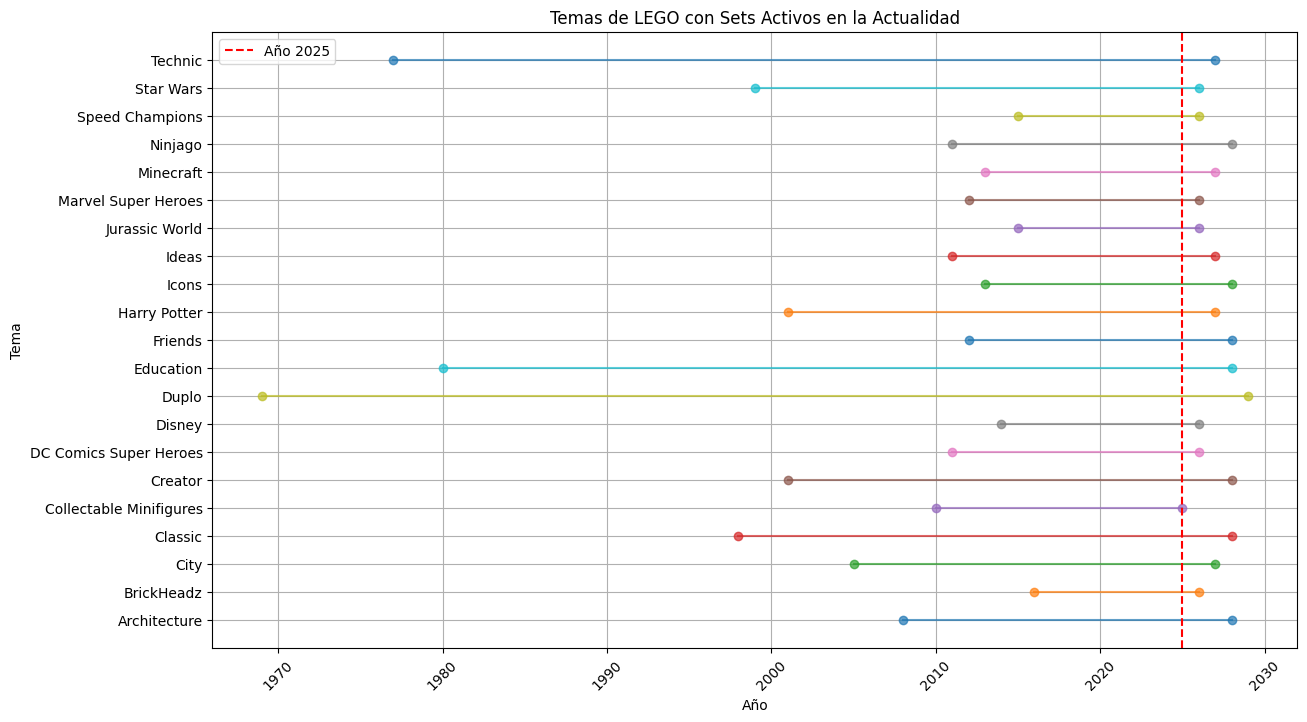

In [20]:
# Agrupo por tema para obtener los rangos de lanzamiento y retirada
theme_ranges = df_lego.groupby('Theme').agg(
    LaunchStart=('LaunchYear', 'min'),
    LaunchEnd=('ExitYear', 'max')
).reset_index()

# Filtro los temas que tienen sets activos en 2025
active_themes = theme_ranges[theme_ranges['LaunchEnd'] >= 2025]

# Filtro el contenido para mostrar solo los temas activos y agrego una línea en 2025 para que sea más fácil de visualizar
plt.figure(figsize=(14, 8))

for index, row in active_themes.iterrows():
    plt.plot([row['LaunchStart'], row['LaunchEnd']], [row['Theme'], row['Theme']], marker='o', linestyle='-', alpha=0.7)

# Agrego una línea vertical para el año 2025
plt.axvline(x=2025, color='r', linestyle='--', label='Año 2025')

# Configuro el gráfico
plt.xlabel('Año')
plt.ylabel('Tema')
plt.title('Temas de LEGO con Sets Activos en la Actualidad')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()

plt.show()


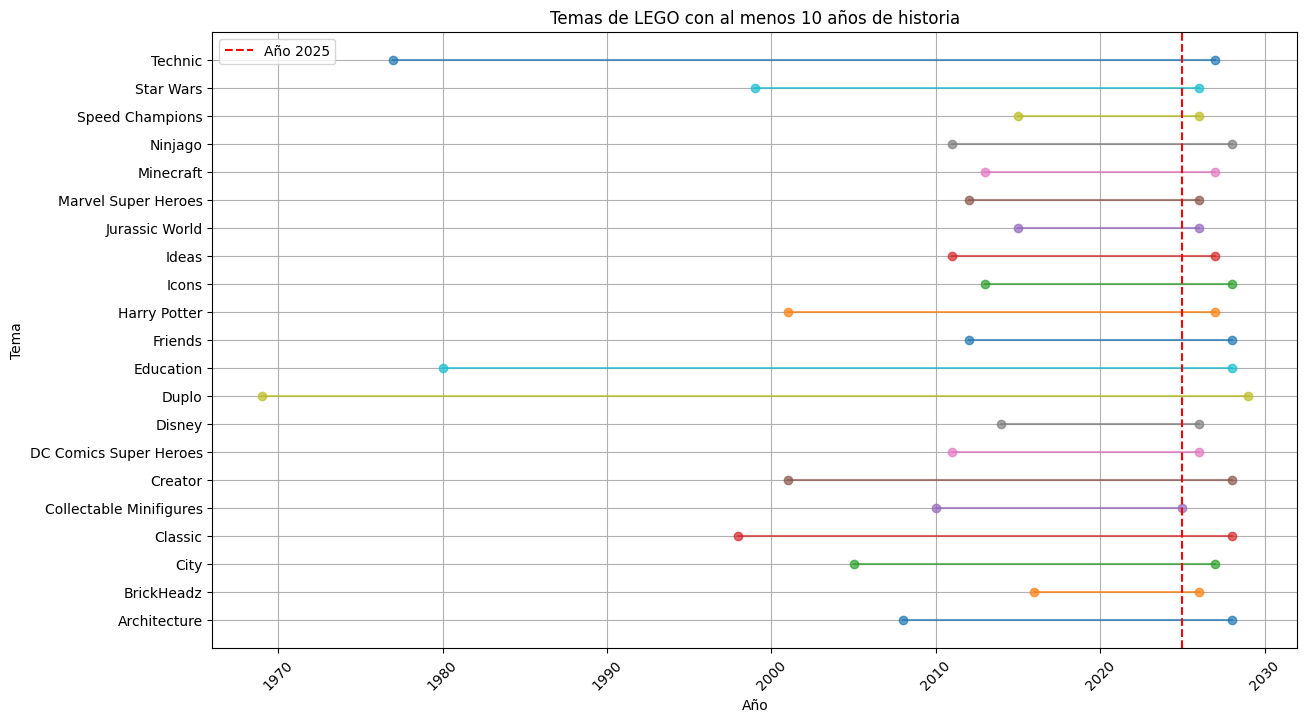

In [21]:
# Hago un filtro de nuevo con los temas que tienen al menos 10 años de historia
long_term_themes = theme_ranges[(theme_ranges['LaunchEnd'] - theme_ranges['LaunchStart']) >= 10]

# Creo el gráfico solo con los temas que tienen al menos 10 años de historia
plt.figure(figsize=(14, 8))

for index, row in long_term_themes.iterrows():
    plt.plot([row['LaunchStart'], row['LaunchEnd']], [row['Theme'], row['Theme']], marker='o', linestyle='-', alpha=0.7)

# Agrego una línea vertical para el año 2025
plt.axvline(x=2025, color='r', linestyle='--', label='Año 2025')

plt.xlabel('Año')
plt.ylabel('Tema')
plt.title('Temas de LEGO con al menos 10 años de historia')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()

plt.show()


In [22]:
long_term_themes

,Theme,LaunchStart,LaunchEnd
0,Architecture,2008,2028
1,BrickHeadz,2016,2026
2,City,2005,2027
3,Classic,1998,2028
4,Collectable Minifigures,2010,2025
5,Creator,2001,2028
6,DC Comics Super Heroes,2011,2026
7,Disney,2014,2026
8,Duplo,1969,2029
9,Education,1980,2028


In [23]:
df_lego

,SetID,Number,YearFrom,Category,Theme,Subtheme,SetName,ImageFilename,USRetailPrice,Pieces,...,YearsSinceExit,PriceChange,ResaleDemand,AppreciationTrend,SizeCategory,Exclusivity,ThemePopularity,InvestmentScore,AnnualPriceIncrease,AnnualPercentageIncrease
0,7530,10,1973,Normal,Duplo,Unknown,Pre-School Set,Unknown,0.0,17.0,...,51,0.0,0.000000,0.0,Small,Regular,0.0,0.0,0.000000,0.0
1,7531,20,1973,Normal,Duplo,Unknown,Building Set,Unknown,0.0,25.0,...,51,0.0,0.000000,0.0,Small,Regular,0.0,0.0,0.000000,0.0
2,1119,28,1979,Normal,Duplo,Unknown,Nursery Furniture,028-1,0.0,7.0,...,45,0.0,0.000000,0.0,Small,Regular,0.0,0.0,0.000000,0.0
3,7532,30,1973,Normal,Duplo,Unknown,Building Set,Unknown,0.0,29.0,...,51,0.0,0.000000,0.0,Small,Regular,0.0,0.0,0.000000,0.0
4,1382,32,1979,Normal,Duplo,Unknown,Living Room Furniture,032-1,0.0,14.0,...,45,0.0,0.000000,0.0,Small,Regular,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8512,22656,WISHINGWELL,2013,Other,Friends,Promotional,Wishing Well,WISHINGWELL-1,0.0,28.0,...,11,0.0,0.000000,0.0,Small,Regular,0.0,0.0,0.000000,0.0
8513,30208,XWING,2019,Other,Star Wars,Promotional,X-wing Trench Run,XWING-2,0.0,52.0,...,5,NaN,0.694707,NaN,Small,Exclusive,0.0,NaN,2.940000,0.0
8514,29327,XWING,2019,Other,Star Wars,Promotional,Mini X-wing Fighter,XWING-1,0.0,60.0,...,5,0.0,0.000000,0.0,Small,Exclusive,0.0,10.0,0.000000,0.0
8515,22978,YODA,2013,Other,Star Wars,Promotional,"Yoda minifig, NY I Heart Torso",YODA-1,0.0,3.0,...,11,NaN,0.000000,NaN,Small,Exclusive,0.0,NaN,256.936364,0.0


In [24]:
df_lego.dtypes

SetID                         int64
Number                       object
YearFrom                      int64
Category                     object
Theme                        object
Subtheme                     object
SetName                      object
ImageFilename                object
USRetailPrice               float64
Pieces                      float64
Minifigs                    float64
PackagingType                object
Availability                 object
Width                       float64
Height                      float64
Depth                       float64
Weight                      float64
AgeMin                      float64
AgeMax                      float64
OwnCount                      int64
WantCount                     int64
Rating                        int64
BrickLinkSoldPriceNew       float64
BrickLinkSoldPriceUsed      float64
LaunchYear                    int64
LaunchMonth                   int64
ExitYear                      int64
ExitMonth                   

In [25]:
# Filtro los sets con ExitYear menor a 2025 y pertenecientes a long_term_themes
df_lego_filtered = df_lego[(df_lego['ExitYear'] < 2025) & (df_lego['Theme'].isin(long_term_themes['Theme']))]

# Recalculo AnnualPercentageIncrease
df_lego_filtered['AnnualPercentageIncrease'] = ((df_lego_filtered['BrickLinkSoldPriceNew'] - df_lego_filtered['USRetailPrice']) / 
                                                (df_lego_filtered['USRetailPrice'] * df_lego_filtered['YearsSinceExit'])) * 100

# Reemplazo valores infinitos o NaN
df_lego_filtered.replace([np.inf, -np.inf], np.nan, inplace=True)
df_lego_filtered['AnnualPercentageIncrease'].fillna(0, inplace=True)

# Cuento la cantidad de sets con revalorización (AnnualPercentageIncrease ≠ 0) por Theme
theme_revalued_counts = df_lego_filtered[df_lego_filtered['AnnualPercentageIncrease'] != 0].groupby('Theme').size()

# Cuento el total de sets por Theme
theme_total_counts = df_lego_filtered.groupby('Theme').size()

# Calculo el porcentaje de sets revalorizados en cada tema
theme_revaluation_percentage = (theme_revalued_counts / theme_total_counts) * 100

# Unifico en un df para mejor visualización
theme_analysis_filtered = pd.DataFrame({
    "Total Sets": theme_total_counts,
    "Revalued Sets": theme_revalued_counts,
    "Percentage Revalued": theme_revaluation_percentage
}).fillna(0).sort_values(by="Percentage Revalued", ascending=False)


/var/folders/41/9xs275yn7jxbs_h59j3pq3sw0000gn/T/ipykernel_46651/2498519677.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lego_filtered['AnnualPercentageIncrease'] = ((df_lego_filtered['BrickLinkSoldPriceNew'] - df_lego_filtered['USRetailPrice']) /
/var/folders/41/9xs275yn7jxbs_h59j3pq3sw0000gn/T/ipykernel_46651/2498519677.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lego_filtered.replace([np.inf, -np.inf], np.nan, inplace=True)
/var/folders/41/9xs275yn7jxbs_h59j3pq3sw0000gn/T/ipykernel_46651/2498519677.py:10: FutureWarning: A value is trying t

In [26]:
theme_analysis_filtered

,Total Sets,Revalued Sets,Percentage Revalued
Theme,,,
BrickHeadz,156,144,92.307692
Speed Champions,63,58,92.063492
Architecture,52,47,90.384615
Collectable Minifigures,874,773,88.443936
Ideas,52,45,86.538462
Icons,75,62,82.666667
Harry Potter,148,119,80.405405
Disney,172,138,80.232558
Minecraft,118,94,79.661017


In [27]:
# Calculo estadísticas de revalorización por tema
theme_stats = df_lego_filtered.groupby('Theme')['AnnualPercentageIncrease'].agg(
    MeanRevaluation='mean',
    MedianRevaluation='median',
    Q1=lambda x: np.percentile(x.dropna(), 25),
    Q3=lambda x: np.percentile(x.dropna(), 75)
).reset_index()

# Hago el merge estas estadísticas al dataframe de análisis
theme_analysis_filtered = theme_analysis_filtered.merge(theme_stats, on='Theme', how='left')

In [28]:
# Ordeno el dataframe por la columna de la mediana de revalorización en orden descendente
theme_analysis_filtered = theme_analysis_filtered.sort_values(by="MedianRevaluation", ascending=False)

In [29]:
theme_analysis_filtered

,Theme,Total Sets,Revalued Sets,Percentage Revalued,MeanRevaluation,MedianRevaluation,Q1,Q3
1,Speed Champions,63,58,92.063492,17.212910,17.389371,0.950475,33.036310
2,Architecture,52,47,90.384615,20.214199,16.504032,4.427840,25.759955
0,BrickHeadz,156,144,92.307692,28.906240,14.088826,4.414186,29.154154
13,Star Wars,904,633,70.022124,14.655230,7.044510,0.000000,20.375935
4,Ideas,52,45,86.538462,6.059202,5.394277,0.000000,12.472157
3,Collectable Minifigures,874,773,88.443936,32.503621,4.829429,0.000000,17.788790
11,Technic,472,347,73.516949,4.638578,3.163591,0.000000,9.155761
8,Minecraft,118,94,79.661017,3.584924,2.445023,-2.213847,12.366302
6,Harry Potter,148,119,80.405405,5.247829,1.571505,-0.812729,12.911557
5,Icons,75,62,82.666667,1.649054,0.470047,-2.128399,8.611502


In [30]:
theme_analysis_filtered['Theme']

1             Speed Champions
2                Architecture
0                  BrickHeadz
13                  Star Wars
4                       Ideas
3     Collectable Minifigures
11                    Technic
8                   Minecraft
6                Harry Potter
5                       Icons
15                    Creator
19             Jurassic World
18                      Duplo
17     DC Comics Super Heroes
16                    Ninjago
10        Marvel Super Heroes
14                       City
12                    Friends
9                     Classic
7                      Disney
20                  Education
Name: Theme, dtype: object